In [4]:
from numpy import *
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from linearKernel import linearKernel
from pylab import scatter, show, legend, xlabel, ylabel, contour, title, plot
import numpy as np

import warnings
warnings.filterwarnings('ignore')

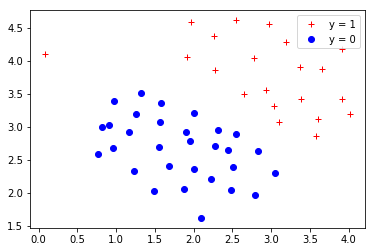

In [7]:
# Load the dataset
# The first two columns contains the exam scores and the third column contains the label.
data = loadtxt('data1.txt', delimiter=',')

X = data[:, 0:2] 
y = data[:, 2]

# Plot data 
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'r+', label="c1")
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bo', label="c2")
plt.legend(['y = 1', 'y = 0'],numpoints=1)
plt.show()

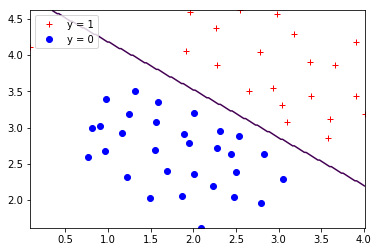

Train Accuracy: 98.039216


In [6]:
C = 1  # SVM regularization parameter

# We calculate the linear kernel between the instances/samples
K = linearKernel(X,X)

# We create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
svc = SVC(C = C, kernel="precomputed")
svc.fit(K,y)

# Plot the decision boundary
u = linspace(min(X[:, 0]),max(X[:, 0]), 200)
v = linspace(min(X[:, 1]),max(X[:, 1]), 200)
z = zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = svc.predict(linearKernel(array([[u[i],v[j]]]),X))
        
plot(X[:,0][y == 1], X[:,1][y == 1], 'r+', label="c1")
plot(X[:,0][y == 0], X[:,1][y == 0], 'bo', label="c2")
contour(u, v, z.T, [0])
legend(['y = 1', 'y = 0', 'Decision boundary'],numpoints=1)
show()

# Compute accuracy on the training set
p = svc.predict(K)
counter = 0
for i in range(y.size):
    if p[i] == y[i]:
        counter += 1
print('Train Accuracy: %f' % (counter / float(y.size) * 100.0))